In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(Path('crypto_data.csv')).drop(columns=["Unnamed: 0"])
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# df.columns

In [4]:
#filter
df_true = df[df["IsTrading"]==True].drop(columns="IsTrading")
df_true

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,SHA-256,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# df_true.drop(columns="IsTrading")

In [6]:
df_dropna = df_true.dropna()
df_dropna

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
#filter for TotalCoinsMined that's larger than 0.
df_mined = df_dropna[df_dropna["TotalCoinsMined"]>0]
df_mined

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Drop CoinName
df_dropCoin = df_mined.drop(columns=['CoinName'])
df_dropCoin

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [9]:
df_dropCoin

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [10]:
# Convert the "Algorithm" and "ProofType" columns to numeric.
x_train = pd.get_dummies(df_dropCoin, columns=["Algorithm", "ProofType"])
x_train

# How did they change?
# Rows didn't change, but column number increased.

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#set scaler to a model
scaler = StandardScaler()
scaler.fit(x_train)
transformed_df = scaler.transform(x_train)

#print(scaler.mean_)

transformed_df

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [12]:
for i in range(18):
    pca = PCA(n_components=i + 80)
    pca.fit(transformed_df)
    print(i + 80, sum(pca.explained_variance_ratio_))
    


80 0.9591851852859501
81 0.9668053350673447
82 0.9731448979897325
83 0.9783246598648667
84 0.9832783170523705
85 0.9875926325387773
86 0.9915136930921494
87 0.9953282261012383
88 0.9983147879800132
89 0.9995006261779599
90 0.9999999999999999
91 0.9999999999999999
92 0.9999999999999999
93 0.9999999999999999
94 0.9999999999999999
95 0.9999999999999999
96 0.9999999999999999
97 0.9999999999999999


In [13]:
# based on the above for loop, n of components should be 86

In [14]:
# fit in n_components=86
pca = PCA(n_components=86)
pca.fit(transformed_df)
pca_86 = pca.transform(transformed_df)

pca_86

array([[-0.33509881,  1.03218907, -0.59071344, ...,  0.13391619,
        -0.11593793,  0.00934363],
       [-0.31843395,  1.03233143, -0.59112555, ...,  0.13399077,
        -0.11564619,  0.00918792],
       [ 2.30546811,  1.65638302, -0.68361667, ..., -0.07341934,
         0.17914389, -1.41905933],
       ...,
       [ 0.32434854, -2.31230764,  0.42151537, ...,  0.23019201,
        -0.01101053,  0.47286829],
       [-0.14936365, -2.04933553,  0.41296826, ...,  0.35568904,
         0.08258903, -0.07056385],
       [-0.2899575 ,  0.82119451, -0.27632685, ...,  1.03190166,
        -0.05476628, -0.9014263 ]])

In [15]:
X_embedded = TSNE(n_components=2).fit_transform(pca_86)
X_embedded.shape

(532, 2)

In [16]:
# plt.plot(X_embedded[:,0], X_embedded[:,1])

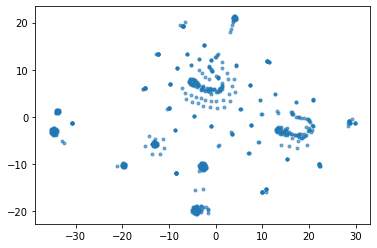

In [17]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=0.6, marker='.')

In [23]:
elbow = []
clusters = []
for i in range(8):
    kmeans = KMeans(n_clusters=2+i).fit(X_embedded)
    elbow.append(kmeans.inertia_)
    clusters.append(i+2)
    
elbow

# kmeans.inertia_
# kmeans.labels_
# kmeans.predict([[0,0], [12,3]])
# kmeans.cluster_centers_

[102452.9375,
 58851.51171875,
 32325.798828125,
 26134.322265625,
 20619.705078125,
 17368.974609375,
 14835.232421875,
 12768.8349609375]

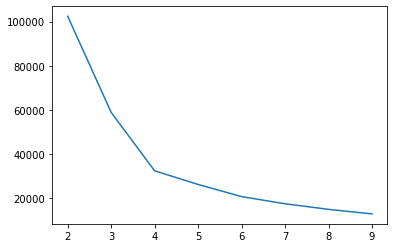

In [26]:
plt.plot(clusters, elbow)

In [ ]:
# the optimal K is 4 from the graph.

In [ ]:
# Recommendation:
# Yes, the cryptocurrencies can be clustered together.
# We can create 4 clusters.